## Part A: Initialize packages and data 

In [153]:
%load_ext autoreload
%autoreload 2

import torch 
import numpy as np
from logistic import LogisticRegression, GradientDescentOptimizer

def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Here we run a gradient descent loop 

In [154]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss_vec = []
for _ in range(100):
    loss = LR.loss(X, y) 
    loss_vec.append(loss)
    opt.step(X, y, alpha = 0.1, beta = .9)

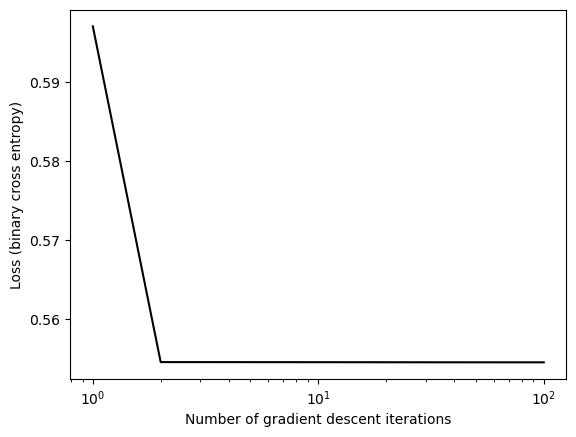

In [155]:
from matplotlib import pyplot as plt
plt.plot(torch.arange(1, len(loss_vec)+1), loss_vec, color = "black")
plt.semilogx()
labs = plt.gca().set(xlabel = "Number of gradient descent iterations", ylabel = "Loss (binary cross entropy)")

## Part B: Experiments

In [156]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss_vec = []
for _ in range(100):
    loss = LR.loss(X, y) 
    loss_vec.append(loss)
    opt.step(X, y, alpha = 0.011, beta = 0)

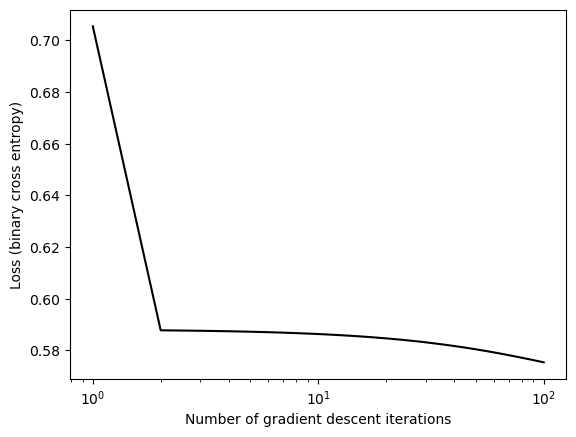

In [157]:
plt.plot(torch.arange(1, len(loss_vec)+1), loss_vec, color = "black")
plt.semilogx()
labs = plt.gca().set(xlabel = "Number of gradient descent iterations", ylabel = "Loss (binary cross entropy)")

We first perform our vanilla gradient descent, which means $p_{dim} = 2\text{, }α = 0.011\text{, and }β = 0$ 
we can see an extremely sharp drop off from our loss which then evens off at around .57

In [176]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss_vec = []
for _ in range(100):
    loss = LR.loss(X, y) 
    loss_vec.append(loss)
    opt.step(X, y, alpha = 0.01, beta = 3)

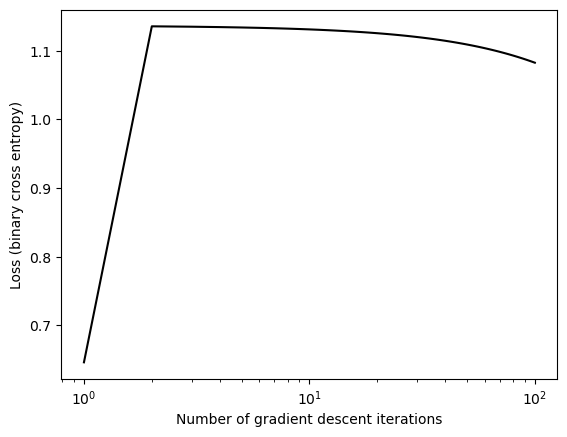

In [177]:
plt.plot(torch.arange(1, len(loss_vec)+1), loss_vec, color = "black")
plt.semilogx()
labs = plt.gca().set(xlabel = "Number of gradient descent iterations", ylabel = "Loss (binary cross entropy)")